# USDA Unemployment
<hr>

In [93]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Data
## US Unemployment data by county
Economic Research Service  
U.S. Department of Agriculture  
link:

### Notes 

- Year 2020, Median Household Income (2019), & '% of State Median HH Income  had 78 Nan Values that are all from Puerto Rico.
- I am going to drop all rows from Puerto Rico, Puerto Rico does not show up in any of the other USDA data.  If we want it back in, it will be easy to re-add the Puerto Rico data.

##  Contants
<hr>

In [94]:
stats_master_list = ['Vermont',
 'Mississippi',
 'Maine',
 'Montana',
 'Washington',
 'District of Columbia',
 'Texas',
 'Alabama',
 'Michigan',
 'Maryland',
 'Rhode Island',
 'South Dakota',
 'Nebraska',
 'Virginia',
 'Florida',
 'Utah',
 'Louisiana',
 'Missouri',
 'Massachusetts',
 'South Carolina',
 'Pennsylvania',
 'Tennessee',
 'Minnesota',
 'Idaho',
 'Alaska',
 'Oklahoma',
 'North Dakota',
 'Arkansas',
 'Georgia',
 'New Hampshire',
 'Indiana',
 'Puerto Rico',
 'New Jersey',
 'Delaware',
 'West Virginia',
 'Colorado',
 'New York',
 'Kansas',
 'Arizona',
 'Ohio',
 'Hawaii',
 'Illinois',
 'Oregon',
 'North Carolina',
 'California',
 'Kentucky',
 'Wyoming',
 'Iowa',
 'Nevada',
 'Connecticut',
 'Wisconsin',
 'New Mexico']

In [95]:
# column Names

columns = [                         'FIPS ',                           'Name',
                                 '2012',                             2013,
                                   2014,                             2015,
                                   2016,                             2017,
                                   2018,                             2019,
                                 '2020', 'Median Household Income (2019)',
          '% of State Median HH Income']

In [96]:
"""
Duplicate check 3
from 
https://thispointer.com/python-3-ways-to-check-if-there-are-duplicates-in-a-list/
"""
def checkIfDuplicates_3(listOfElems):
    ''' Check if given list contains any duplicates '''    
    for elem in listOfElems:
        if listOfElems.count(elem) > 1:
            return True
    return False

## File managment
<hr>

In [97]:
files = os.listdir("../data_raw/USDA_gov-unemplyment/")

In [98]:
# remove mac file 
files.remove('.DS_Store')

In [99]:
#files

# Example of the csv files
<hr>

In [100]:
# random peek
df = pd.read_excel('../data_raw/USDA_gov-unemplyment/UnemploymentReport (14).xlsx', skiprows=2)

In [101]:
df.shape

(95, 14)

In [102]:
df.head()

,FIPS,Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,Median Household Income (2019),NaN,% of State Median HH Income
0,18000,Indiana,8.2,7.5,5.9,4.8,4.4,3.5,3.4,3.2,7.1,57617.0,NaN,1.000000
1,18001,"Adams County, IN",6.9,6.0,4.6,3.8,3.5,2.6,2.6,2.6,5.6,53532.0,NaN,0.929101
2,18003,"Allen County, IN",8.3,7.4,5.7,4.6,4.2,3.3,3.1,3.1,7.7,56838.0,NaN,0.986480
3,18005,"Bartholomew County, IN",6.3,5.9,4.4,3.6,3.3,2.7,2.6,2.4,6.5,71181.0,NaN,1.235417
4,18007,"Benton County, IN",7.3,6.9,5.4,4.5,4.2,3.4,3.2,3.1,5.2,55016.0,NaN,0.954857


In [103]:
df.tail()

,FIPS,Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,Median Household Income (2019),NaN,% of State Median HH Income
90,18179,"Wells County, IN",7.1,6.2,4.8,3.9,3.5,2.9,2.8,2.7,5.7,61636.0,NaN,1.069754
91,18181,"White County, IN",7.7,6.7,5.1,4.0,3.9,3.2,3.0,2.6,5.0,58295.0,NaN,1.011767
92,18183,"Whitley County, IN",7.8,6.8,5.1,4.1,3.8,2.9,2.8,2.9,5.9,67347.0,NaN,1.168874
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,"Sources: Bureau of Labor Statistics, Local Are...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create master DataFrame
<hr>

In [104]:
# Concat 

# create master file 
master_df = pd.DataFrame(columns = columns)
state_name_list = []

# LOOP 
for file in files:
    # read excel file
    _df = pd.read_excel('../data_raw/USDA_gov-unemplyment/'+file, skiprows=2)
    # read state_name
    state_name = _df.iloc[0,1]
    

# DROP
    #drop row 0
    _df.drop(0, inplace = True)
    
    # Drop last 2 rows 
    _df.drop(_df.tail(1).index, inplace = True)

    # work around to drop NaN column 
    _temp_df = _df.iloc[:,0:12]
    
    # work around to drop NaN column 
    _temp_df['% of State Median HH Income'] = _df['% of State Median HH Income']
    
# add Column for STATE name
    # add state column 
    _temp_df['state'] = state_name
    state_name_list.append(state_name)
    
    # Concat 
    master_df = pd.concat([master_df, _temp_df])
    

<br>

## Dataframe clean up
<hr>

In [105]:
# reset Index
master_df.reset_index(drop = True, inplace = True )

In [106]:
master_df.columns

Index([                         'FIPS ',                           'Name',
                                 '2012',                             2013,
                                   2014,                             2015,
                                   2016,                             2017,
                                   2018,                             2019,
                                 '2020', 'Median Household Income (2019)',
          '% of State Median HH Income',                          'state'],
      dtype='object')

In [107]:
# Rename columns 
master_df.rename(columns = {'FIPS ':'FIPS'}, inplace = True)

In [108]:
# shape
master_df.shape

(3269, 14)

In [109]:
master_df.head()

,FIPS,Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,Median Household Income (2019),% of State Median HH Income,state
0,50001,"Addison County, VT",4.4,4.1,3.8,3.4,2.9,2.8,2.5,2.3,5.0,73574.0,1.162435,Vermont
1,50003,"Bennington County, VT",5.7,5.2,4.7,4.2,3.6,3.7,3.1,2.9,6.6,56948.0,0.899752,Vermont
2,50005,"Caledonia County, VT",6.1,5.3,4.9,4.6,4.0,3.7,3.2,2.9,5.8,50942.0,0.804860,Vermont
3,50007,"Chittenden County, VT",3.7,3.4,3.1,2.7,2.4,2.3,2.0,1.7,4.8,76483.0,1.208396,Vermont
4,50009,"Essex County, VT",7.8,6.7,6.0,5.7,4.8,4.7,3.6,3.1,6.5,45796.0,0.723556,Vermont


## Remove rows with all nan's
<hr>

In [112]:
master_df.isna().sum()

FIPS                               55
Name                               55
2012                               55
2013                               55
2014                               55
2015                               55
2016                               55
2017                               55
2018                               55
2019                               55
2020                              133
Median Household Income (2019)    133
% of State Median HH Income       133
state                               0
dtype: int64

In [114]:
master_df[ master_df['FIPS'].isnull()].head()

,FIPS,Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,Median Household Income (2019),% of State Median HH Income,state
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vermont
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mississippi
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maine
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Montana
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Washington


In [117]:
nan_rows = master_df[ master_df['FIPS'].isnull()].index
nan_rows

Int64Index([  14,   97,  114,  171,  211,  213,  468,  469,  537,  621,  646,
             652,  718,  812,  946,  947, 1015, 1045, 1110, 1226, 1241, 1288,
            1356, 1452, 1540, 1585, 1611, 1689, 1743, 1819, 1979, 1980, 1991,
            2084, 2163, 2185, 2189, 2245, 2310, 2373, 2479, 2495, 2584, 2589,
            2692, 2729, 2830, 2889, 3010, 3034, 3134, 3152, 3161, 3234, 3268],
           dtype='int64')

In [118]:
len(nan_rows)

55

In [119]:
# remove rows with all Nans
master_df.drop(nan_rows, inplace = True)

In [150]:
master_df.isna().sum()

FIPS                              0
Name                              0
2012                              0
2013                              0
2014                              0
2015                              0
2016                              0
2017                              0
2018                              0
2019                              0
2020                              0
Median Household Income (2019)    0
% of State Median HH Income       0
state                             0
dtype: int64

In [132]:
master_df[ master_df['2020'].isnull()].iloc[20:25,:] 

,FIPS,Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,Median Household Income (2019),% of State Median HH Income,state
2105,72041,"Cidra Municipio, PR",14.5,12.7,12.0,9.9,10.2,8.4,7.6,6.8,NaN,NaN,NaN,Puerto Rico
2106,72043,"Coamo Municipio, PR",21.0,20.2,21.0,18.9,18.1,16.2,13.9,12.3,NaN,NaN,NaN,Puerto Rico
2107,72045,"Comerio Municipio, PR",20.4,20.0,18.8,15.2,13.5,11.8,10.3,8.9,NaN,NaN,NaN,Puerto Rico
2108,72047,"Corozal Municipio, PR",16.0,15.0,15.1,13.5,12.3,11.3,9.4,9.1,NaN,NaN,NaN,Puerto Rico
2109,72049,"Culebra Municipio, PR",5.7,6.7,6.2,3.7,3.3,4.4,4.4,3.1,NaN,NaN,NaN,Puerto Rico


- There are 78 rows that do have nans for 2020,   
- all of the Remaing rows with nan's are form Puerto Rico

- I am going to remove the Nans from Puerto Rico because the other USDA data sets do not have Puerto Rico

In [137]:
master_df[ master_df['state'] == 'Puerto Rico' ].index

Int64Index([2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095,
            2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106,
            2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117,
            2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128,
            2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139,
            2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150,
            2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161,
            2162],
           dtype='int64')

In [140]:
# Drop all Rows with state as Puerto Rico

index_names = master_df[ master_df['state'] == 'Puerto Rico' ].index
master_df.drop(index_names, inplace = True)

In [141]:
master_df.drop([], inplace = True  )

In [ ]:
master_df.isna().sum()

In [142]:
master_df.shape

(3136, 14)

<br>

# Sanity Check
<hr>

In [143]:
# unique Count of stats

In [144]:
master_df['state'].nunique()

51

In [145]:
len(state_name_list)

52

In [146]:
# checks if there are duplicates in state list
checkIfDuplicates_3(state_name_list)

False

In [147]:
master_df['state'].nunique()

51

# Write to CSV
<hr>

In [148]:
master_df.to_csv('../data/USDA/USDA_unemployment.csv', index=False)

In [149]:
master_df.shape

(3136, 14)

<br>

# EDA

In [34]:
master_df.shape

(3214, 14)

In [107]:
master_df.head(2)

,FIPS,Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,Median Household Income (2019),% of State Median HH Income,state
1,50001,"Addison County, VT",4.4,4.1,3.8,3.4,2.9,2.8,2.5,2.3,5.0,73574.0,1.162435,Vermont
2,50003,"Bennington County, VT",5.7,5.2,4.7,4.2,3.6,3.7,3.1,2.9,6.6,56948.0,0.899752,Vermont


Text(0.5, 1.0, '% of Unemployment by Household Median income 2019')

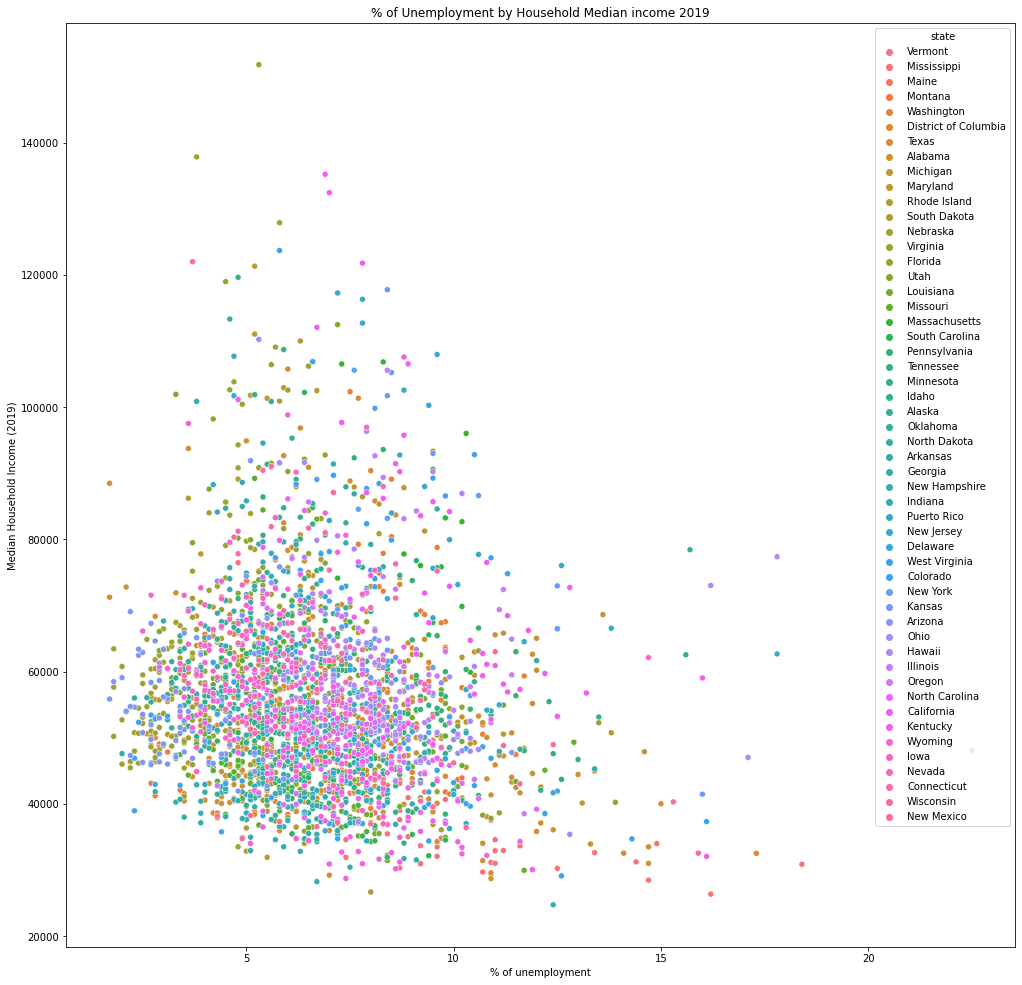

In [36]:
plt.figure(figsize = (17, 17))
sns.scatterplot(data = master_df, x = '2020', y = "Median Household Income (2019)", hue = 'state');

plt.xlabel("% of unemployment")
plt.title("% of Unemployment by Household Median income 2019")